# import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

# Read the dataset

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Train test split

In [4]:
x = df.drop('target',axis=1)
y = df['target']

In [6]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=20,stratify=y)

# Model building

## 1. Decision tree

In [8]:
dt_model = DecisionTreeClassifier()
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [10]:
print(dt_model.score(xtrain,ytrain))
print(dt_model.score(xtest,ytest))

1.0
0.7236842105263158


# 2. Random forest

In [21]:
rf_model = RandomForestClassifier(random_state=15)  # bootstraping
rf_model.fit(xtrain,ytrain)

RandomForestClassifier(random_state=15)

In [22]:
print(rf_model.score(xtrain,ytrain))
print(rf_model.score(xtest,ytest))

1.0
0.8552631578947368


# Model evaluation

In [28]:
# Testing data evaluation
ypredtest = rf_model.predict(xtest)

accuracy = accuracy_score(ytest,ypredtest)
print('accuracy score: ',accuracy)

confusionmatrix = confusion_matrix(ytest,ypredtest)
print('confusion matrix:\n',confusionmatrix)

classificationreport = classification_report(ytest,ypredtest)
print('classification report:\n ',classificationreport)

accuracy score:  0.8552631578947368
confusion matrix:
 [[29  6]
 [ 5 36]]
classification report:
                precision    recall  f1-score   support

           0       0.85      0.83      0.84        35
           1       0.86      0.88      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76



In [29]:
# Training data evaluation
ypredtrain = rf_model.predict(xtrain)

accuracy = accuracy_score(ytrain,ypredtrain)
print('accuracy score: ',accuracy)

confusionmatrix = confusion_matrix(ytrain,ypredtrain)
print('confusion matrix:\n',confusionmatrix)

classificationreport = classification_report(ytrain,ypredtrain)
print('classification report:\n ',classificationreport)

accuracy score:  1.0
confusion matrix:
 [[103   0]
 [  0 124]]
classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00       124

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



# Hyperparameter tuning

In [30]:
rf_model  = RandomForestClassifier(random_state=15)

hyp = {'n_estimators':np.arange(5,100,5),'criterion':['gini','entropy'],
        'max_depth':np.arange(1,20),'min_samples_split':np.arange(2,20),
        'min_samples_leaf':np.arange(1,15),'max_features':['sqrt','log2'],
         'bootstrap':['True'],'oob_score':['True']}

rscv_rf_model = RandomizedSearchCV(rf_model,hyp,cv=7)

rscv_rf_model.fit(xtrain,ytrain)

RandomizedSearchCV(cv=7, estimator=RandomForestClassifier(random_state=15),
                   param_distributions={'bootstrap': ['True'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95]),
                                        'oob_score': ['True']})

In [31]:
rscv_rf_model.best_estimator_

RandomForestClassifier(bootstrap='True', max_depth=19, max_features='sqrt',
                       min_samples_leaf=14, min_samples_split=4,
                       n_estimators=15, oob_score='True', random_state=15)

In [32]:
rf_model = rscv_rf_model.best_estimator_
rf_model.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap='True', max_depth=19, max_features='sqrt',
                       min_samples_leaf=14, min_samples_split=4,
                       n_estimators=15, oob_score='True', random_state=15)

# Model evaluation

In [33]:
# Testing data evaluation
ypredtest = rf_model.predict(xtest)

accuracy = accuracy_score(ytest,ypredtest)
print('accuracy score: ',accuracy)

confusionmatrix = confusion_matrix(ytest,ypredtest)
print('confusion matrix:\n',confusionmatrix)

classificationreport = classification_report(ytest,ypredtest)
print('classification report:\n ',classificationreport)

accuracy score:  0.8421052631578947
confusion matrix:
 [[27  8]
 [ 4 37]]
classification report:
                precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.82      0.90      0.86        41

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



In [34]:
# Training data evaluation
ypredtrain = rf_model.predict(xtrain)

accuracy = accuracy_score(ytrain,ypredtrain)
print('accuracy score: ',accuracy)

confusionmatrix = confusion_matrix(ytrain,ypredtrain)
print('confusion matrix:\n',confusionmatrix)

classificationreport = classification_report(ytrain,ypredtrain)
print('classification report:\n ',classificationreport)

accuracy score:  0.8722466960352423
confusion matrix:
 [[ 82  21]
 [  8 116]]
classification report:
                precision    recall  f1-score   support

           0       0.91      0.80      0.85       103
           1       0.85      0.94      0.89       124

    accuracy                           0.87       227
   macro avg       0.88      0.87      0.87       227
weighted avg       0.88      0.87      0.87       227



In [36]:
rf_model.oob_score_

0.8237885462555066

In [ ]:
n_estimators=100,
criterion='gini',
max_depth=None,
min_samples_split=2,
min_samples_leaf=1,
max_features={"auto", "sqrt", "log2"}
bootstrap=True,
oob_score=False

# Random forest Feature importance

age         0.027649
sex         0.031804
cp          0.214031
trestbps    0.034295
chol        0.011973
fbs         0.000000
restecg     0.006176
thalach     0.090738
exang       0.041005
oldpeak     0.088980
slope       0.086689
ca          0.252250
thal        0.114411
dtype: float64


<AxesSubplot:>

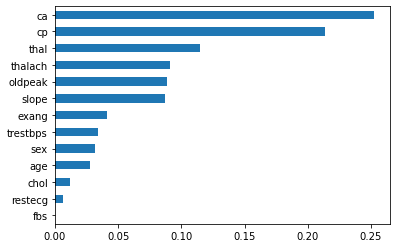

In [42]:
array = rf_model.feature_importances_
s1 = pd.Series(array,index = x.columns)
print(s1)
s1.sort_values().plot(kind='barh')